# Anomaly Detection Through Clustering Exercises
1. Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.
2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.
3. Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [1]:
#imports
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib qt
import seaborn as sns
# sklearn for scaling and clustering:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# import custom modules
import prepare as p

### 1. Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.


In [2]:
# import database
database = 'grocery_db'
query = 'SELECT * FROM grocery_customers'


df = p.get_any_data(database, query)

In [3]:
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
p.overview(df)

============== customer_id ==============
# Unique Vals: 440

============== Channel ==============
# Unique Vals: 2
1    298
2    142
Name: Channel, dtype: int64

============== Region ==============
# Unique Vals: 3
1     77
2     47
3    316
Name: Region, dtype: int64

============== Fresh ==============
# Unique Vals: 433

============== Milk ==============
# Unique Vals: 421

============== Grocery ==============
# Unique Vals: 430

============== Frozen ==============
# Unique Vals: 426

============== Detergents_Paper ==============
# Unique Vals: 417

============== Delicassen ==============
# Unique Vals: 403



In [5]:
# pick features we want to look at
selected_feats = ['Frozen', 'Grocery', 'Delicassen']

In [6]:
# pretend we are already working with just the train set

# create dataframe with selected features
selected_feats_df = df[selected_feats]

In [7]:
# scale data
# make scaler
mm_scaler = MinMaxScaler()

# fit scaler
mm_scaler.fit(selected_feats_df)

# use scaler
selected_feats_df = mm_scaler.fit_transform(selected_feats_df)

selected_feats_df

array([[0.0031063 , 0.08146416, 0.02784731],
       [0.02854842, 0.10309667, 0.03698373],
       [0.03911643, 0.08278992, 0.16355861],
       ...,
       [0.00677142, 0.32594285, 0.03888194],
       [0.01664914, 0.02402535, 0.04426366],
       [0.00065742, 0.02702178, 0.00102211]])

In [8]:
# DBSCAN

# make dbScan
dbscan = DBSCAN(eps = 0.1, min_samples=20)

# fit dbscan
dbscan.fit(selected_feats_df)

DBSCAN(eps=0.1, min_samples=20)

In [9]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = ["Scaled_" + feat for feat in selected_feats]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(selected_feats_df, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Frozen,Scaled_Grocery,Scaled_Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338,0.003106,0.081464,0.027847
1,1,2,3,7057,9810,9568,1762,3293,1776,0.028548,0.103097,0.036984
2,2,2,3,6353,8808,7684,2405,3516,7844,0.039116,0.082790,0.163559
3,3,1,3,13265,1196,4221,6404,507,1788,0.104842,0.045464,0.037234
4,4,2,3,22615,5410,7198,3915,1777,5185,0.063934,0.077552,0.108093


In [10]:
# lets look at the lables
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [11]:
# add labels to dataframe
df['labels'] = dbscan.labels_
df.labels.value_counts()

 0    426
-1     14
Name: labels, dtype: int64

- Looks like there is 1 cluster (0)
- And there are 14 outliers 
- Next step to visualize

<AxesSubplot:xlabel='Frozen', ylabel='Grocery'>

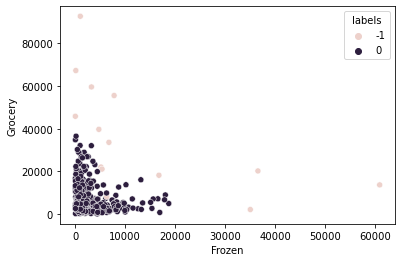

In [12]:
# scatter plot of 2 of the variables 
%matplotlib inline
sns.scatterplot(data = df, x = 'Frozen', y = 'Grocery', hue = 'labels')

<AxesSubplot:xlabel='Frozen', ylabel='Delicassen'>

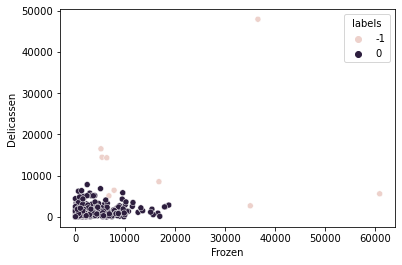

In [13]:
sns.scatterplot(data = df, x = 'Frozen', y = 'Delicassen', hue = 'labels')

<AxesSubplot:xlabel='Grocery', ylabel='Delicassen'>

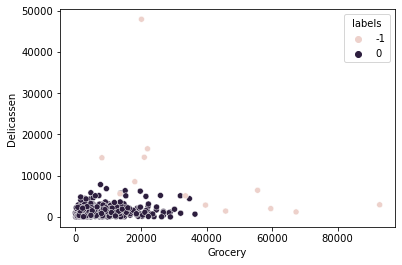

In [14]:
sns.scatterplot(data = df, x = 'Grocery', y = 'Delicassen', hue = 'labels')

In [15]:
# try 3d plotting 
# will create popout (need to comment out when you want to graph again)
%matplotlib qt


# set up figure
fig = plt.figure(1, figsize = (10,10))

# wrap in 3d axis
ax = Axes3D(fig)

# plot scatter using ax object
ax.scatter(df.Frozen,
          df.Grocery,
          df.Delicassen,
          c = df.labels,
          edgecolor = 'k')

ax.set_xlabel('Frozen')
ax.set_ylabel('Grocery')
ax.set_zlabel('Delicassen')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


[Text(-10000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10000.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(30000.0, 0, ''),
 Text(40000.0, 0, ''),
 Text(50000.0, 0, ''),
 Text(60000.0, 0, '')]

### Takeaways
- Seems to be some points that aren't actually outliers
- Will run again tweaking the hyper parameters

In [16]:
# DBSCAN with eps as 0.2

# make dbScan
dbscan = DBSCAN(eps = 0.2, min_samples=20)

# fit dbscan
dbscan.fit(selected_feats_df)

DBSCAN(eps=0.2, min_samples=20)

In [17]:
# add labels to dataframe
df['labels2'] = dbscan.labels_
df.labels.value_counts()

 0    426
-1     14
Name: labels, dtype: int64

In [18]:
# DBSCAN with different hyper parameters

# make dbScan
dbscan = DBSCAN(eps = 0.7, min_samples=5)

# fit dbscan
dbscan.fit(selected_feats_df)

DBSCAN(eps=0.7)

In [19]:
# add labels to dataframe
df['labels2'] = dbscan.labels_
df.labels.value_counts()

 0    426
-1     14
Name: labels, dtype: int64

### Takeaways Hyperparameters
- Looks like when I change the hyper parameters there are still 14 outliers
- Would have to look into some dbscan model selector stuff to see how to run through those hyper parameters

### 2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.


### 3. Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).